### Objective of project
Problem statment: This is the data of Income evaluation for different countries. Based on the available
features, build a model to predict whether a person's income exceeds a certain threshold (e.g., <=50K or
>50K), Which will help to identify the factors that contribute to higher incomes.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn

In [2]:
df = pd.read_csv("data_inc.csv")

In [3]:
df

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,NaN
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,NaN
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,NaN
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,NaN


In [4]:
df.drop(['Unnamed: 15'], axis=1 , inplace = True)

### Cleaning dataset

In [5]:
df[" Education"].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  Education, dtype: int64

### Dealing with Missing Value

In [6]:
df.isnull().sum()/len(df)*100

Age                 0.0
Profession Class    0.0
Final_census        0.0
 Education          0.0
 Education-num      0.0
 marital-status     0.0
 occupation         0.0
 relationship       0.0
 race               0.0
Gender              0.0
 capital-gain       0.0
 capital-loss       0.0
 hours-per-week     0.0
 country            0.0
 income             0.0
dtype: float64

In [7]:
df1 = df.copy()

### Feature Engineering & EDA

In [8]:
df[" Education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [9]:
df1 = df.copy()

In [10]:
df1[" Education"].replace([' 1st-4th' , ' 10th' ,' 7th-8th' , ' 9th',' 12th',' 5th-6th'],"dropout" , inplace = True)
df1[" Education"].replace([ ' Prof-school' ,' Doctorate', ' Masters' ], 'Masters')
df1[" Education"].replace([' Some-college',' Assoc-acdm',' Assoc-voc'] , 'avgCollege' , inplace = True)
df1[" Education"].replace([' HS-grad'] , 'goodgrades' , inplace = True)

In [11]:
df1[[' Education', ' Education-num']].groupby([' Education'], as_index=False).mean().sort_values(by=' Education-num', ascending=False)

,Education,Education-num
2,Doctorate,16.000000
5,Prof-school,15.000000
3,Masters,14.000000
1,Bachelors,13.000000
6,avgCollege,10.360986
8,goodgrades,9.000000
0,11th,7.000000
7,dropout,5.137430
4,Preschool,1.000000


In [12]:
df1[" Education"].unique()

array([' Bachelors', 'goodgrades', ' 11th', ' Masters', 'dropout',
       'avgCollege', ' Doctorate', ' Prof-school', ' Preschool'],
      dtype=object)

<Axes: xlabel='count', ylabel=' Education'>

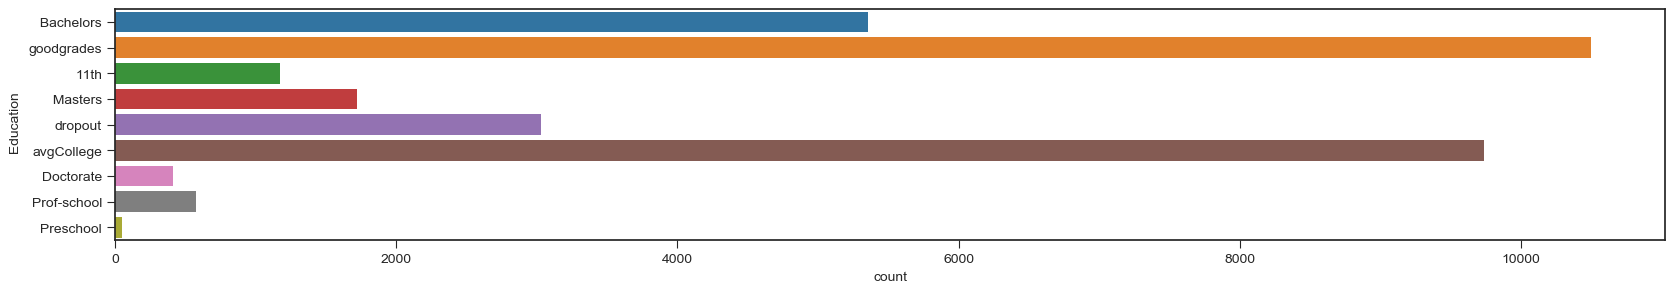

In [13]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y=" Education" , data = df1)

In [14]:
df1[' marital-status'].replace([' Never-married' ,' Married-spouse-absent' , ], 'NotMarried', inplace = True)
df1[' marital-status'].replace([' Married-AF-spouse' , ' Married-civ-spouse'], 'Married' , inplace = True)
df1[' marital-status'].replace([' Separated' , ' Divorced'], 'Separated',inplace=True)
df1[' marital-status'].replace(['Widowed'], 'Widow',inplace=True)

In [15]:
df1[' marital-status'].unique()

array(['NotMarried', 'Married', 'Separated', ' Widowed'], dtype=object)

<Axes: xlabel='count', ylabel=' marital-status'>

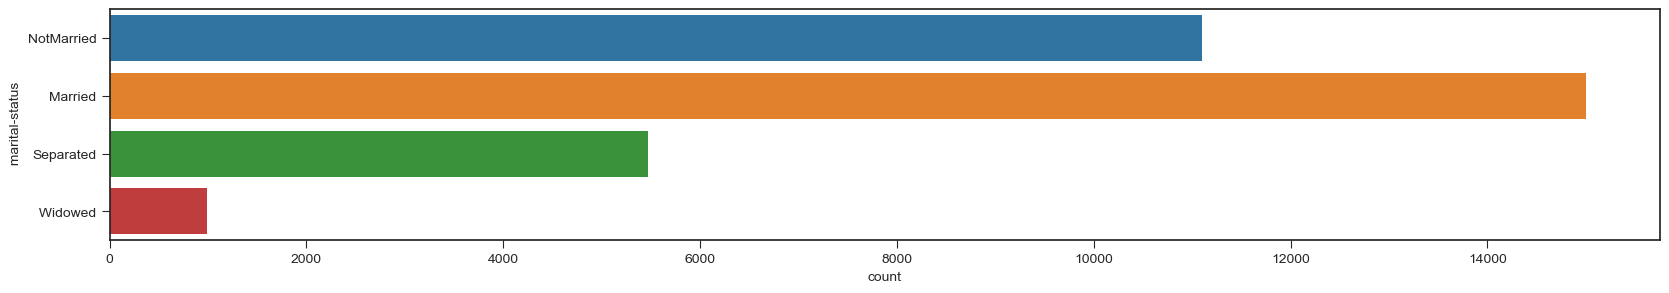

In [16]:
fig = plt.figure(figsize=(20,3))
sns.countplot(y=" marital-status" , data = df1)

<Axes: xlabel='count', ylabel=' occupation'>

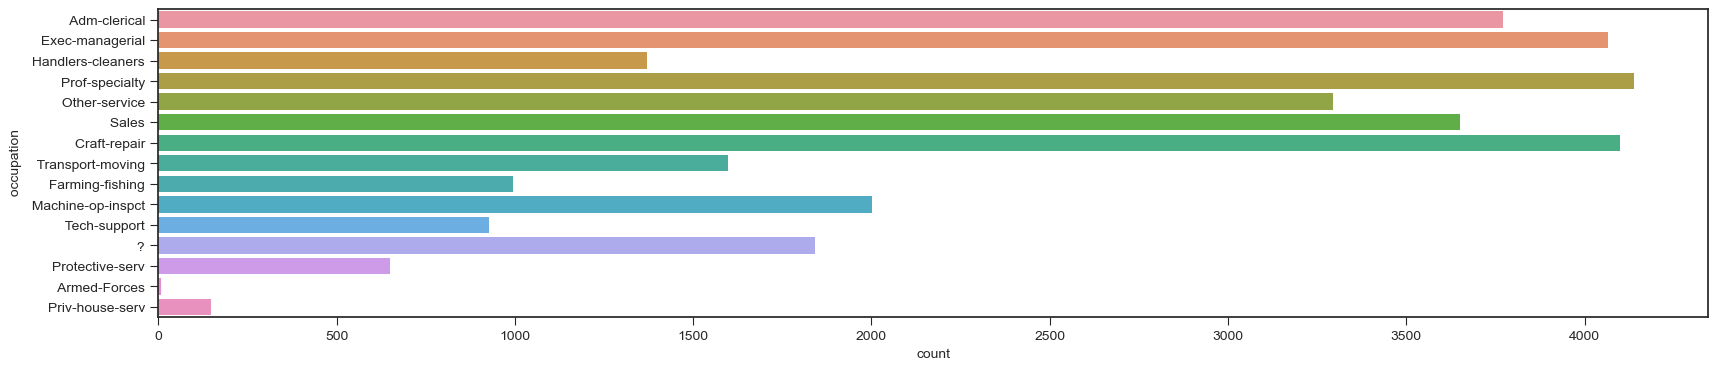

In [17]:
plt.figure(figsize=(20,4))
sns.countplot(y=" occupation", data=df1)

<Axes: xlabel='count', ylabel='Profession Class'>

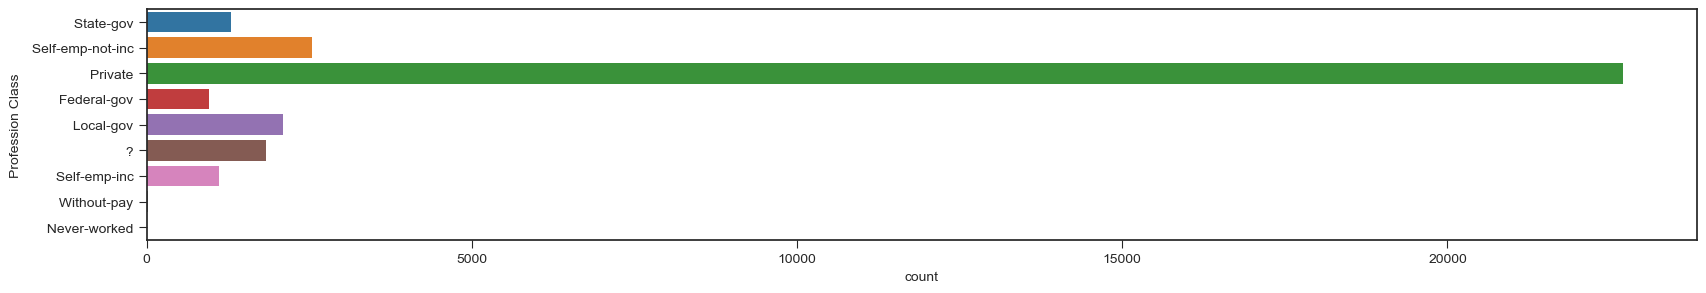

In [18]:
plt.figure(figsize=(20,3))
sns.countplot(y="Profession Class", data=df1)

<Axes: xlabel='count', ylabel=' income'>

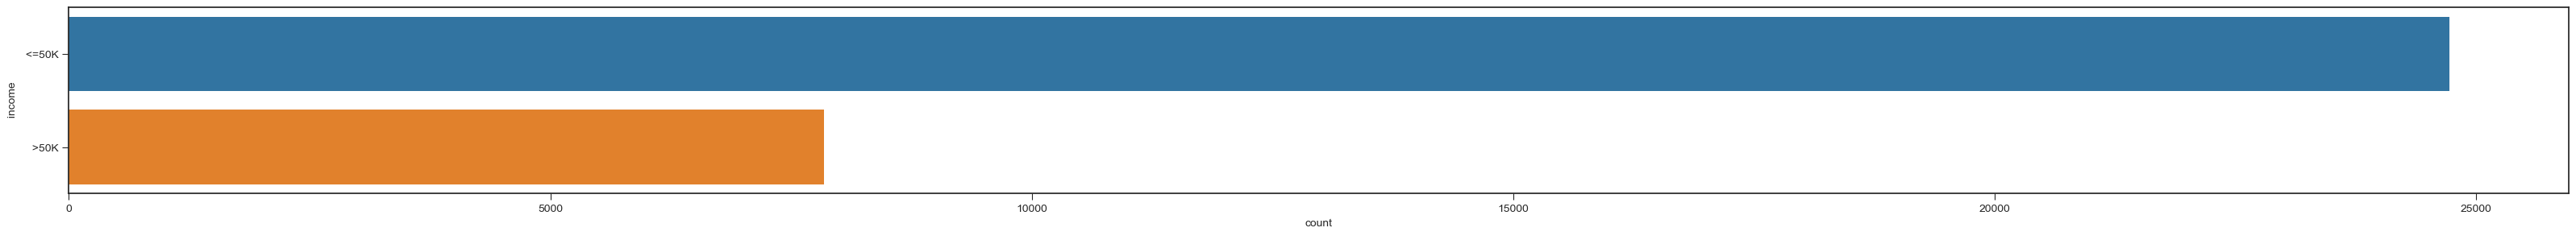

In [19]:
plt.figure(figsize=(40,3))
sns.countplot(y=" income", data=df1)

In [20]:
# make the age variable discretized
df1['age'] = pd.cut(df1['Age'], 20)

<Axes: xlabel='count', ylabel='age'>

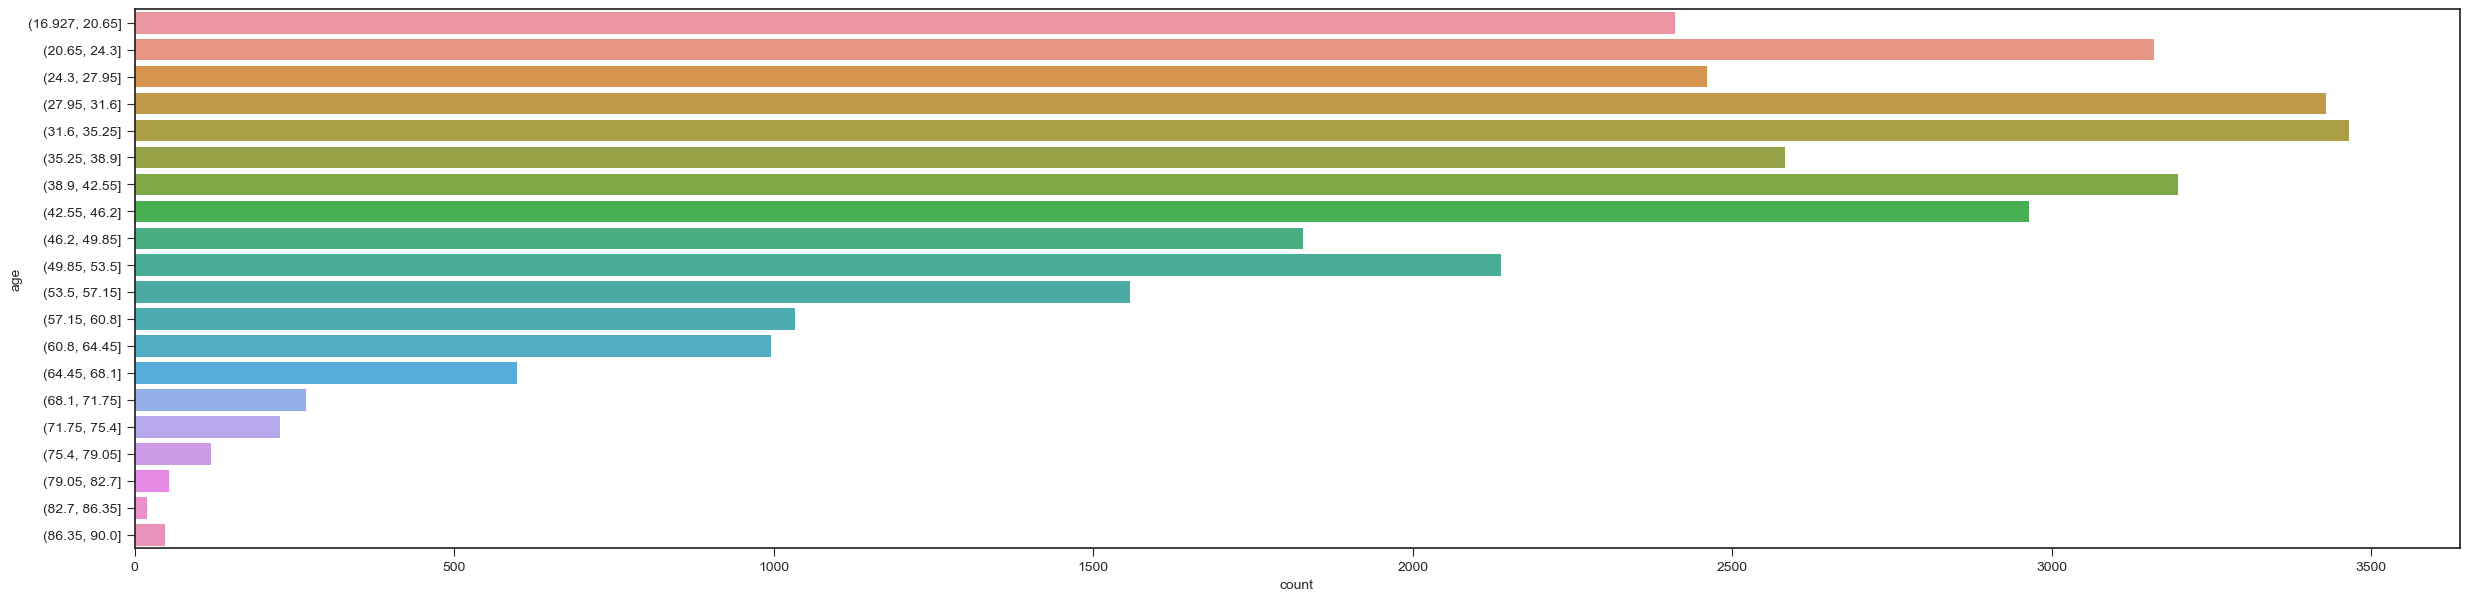

In [21]:
plt.figure(figsize=(30,7))
sns.countplot(y="age", data=df1)

In [22]:
corr_matrix1 = df1.corr()
corr_matrix1

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Final_census,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
Education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


### Heat map for checking Collinearity

<Axes: >

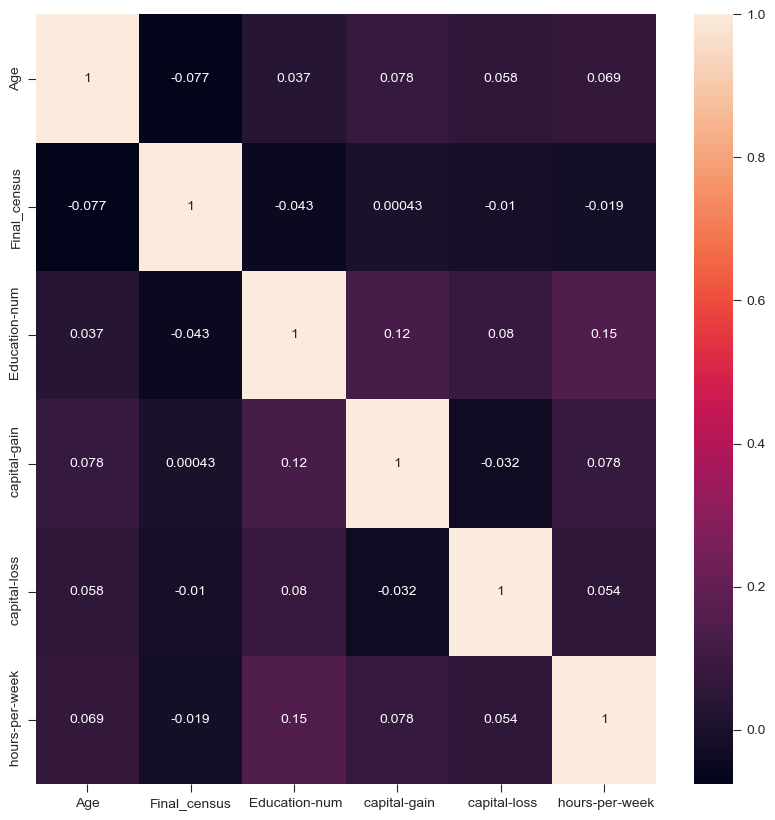

In [23]:
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix1 , annot = True)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               32561 non-null  int64   
 1   Profession Class  32561 non-null  object  
 2   Final_census      32561 non-null  int64   
 3    Education        32561 non-null  object  
 4    Education-num    32561 non-null  int64   
 5    marital-status   32561 non-null  object  
 6    occupation       32561 non-null  object  
 7    relationship     32561 non-null  object  
 8    race             32561 non-null  object  
 9   Gender            32561 non-null  object  
 10   capital-gain     32561 non-null  int64   
 11   capital-loss     32561 non-null  int64   
 12   hours-per-week   32561 non-null  int64   
 13   country          32561 non-null  object  
 14   income           32561 non-null  object  
 15  age               32561 non-null  category
dtypes: category(1), int64(

<Axes: >

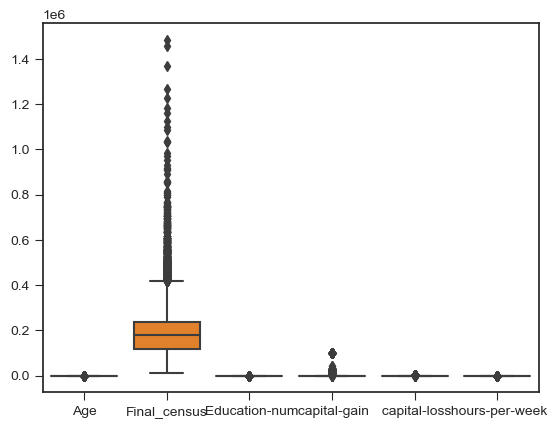

In [24]:
sns.boxplot(data= df1)

### Outlair treatment

### using IQR method

In [25]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3-Q1
Upper_fence=(Q3+1.5*IQR)
Lower_fence=(Q1-1.5*IQR)
print("Upper fence \n",Upper_fence)
print("Lower fence \n",Lower_fence)

Upper fence 
 Age                    78.0
Final_census       415887.0
 Education-num         16.5
 capital-gain           0.0
 capital-loss           0.0
 hours-per-week        52.5
dtype: float64
Lower fence 
 Age                   -2.0
Final_census      -61009.0
 Education-num         4.5
 capital-gain          0.0
 capital-loss          0.0
 hours-per-week       32.5
dtype: float64


In [26]:
df1.describe()

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [27]:
df1["Final_census"] = np.where(df1["Final_census"]>415887.0,415887.0,np.where(df1["Final_census"]<-415887.0,-415887,df1['Final_census']))

In [28]:
df1['Age'] = np.where(df1['Age']>78.0,78.0 ,np.where(df1['Age']<-2.0 ,-2.0,df1['Age']))

In [29]:
df1[' hours-per-week'] = np.where(df1[' hours-per-week']>52.5,52.5,np.where(df1[' hours-per-week']<52.5 , 52.5,df1[" hours-per-week"]))

In [30]:
df1.describe()

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.0
mean,38.555603,186829.079236,10.080679,1077.648844,87.303830,52.5
std,13.556130,95129.625135,2.572720,7385.292085,402.960219,0.0
min,17.000000,12285.000000,1.000000,0.000000,0.000000,52.5
25%,28.000000,117827.000000,9.000000,0.000000,0.000000,52.5
50%,37.000000,178356.000000,10.000000,0.000000,0.000000,52.5
75%,48.000000,237051.000000,12.000000,0.000000,0.000000,52.5
max,78.000000,415887.000000,16.000000,99999.000000,4356.000000,52.5


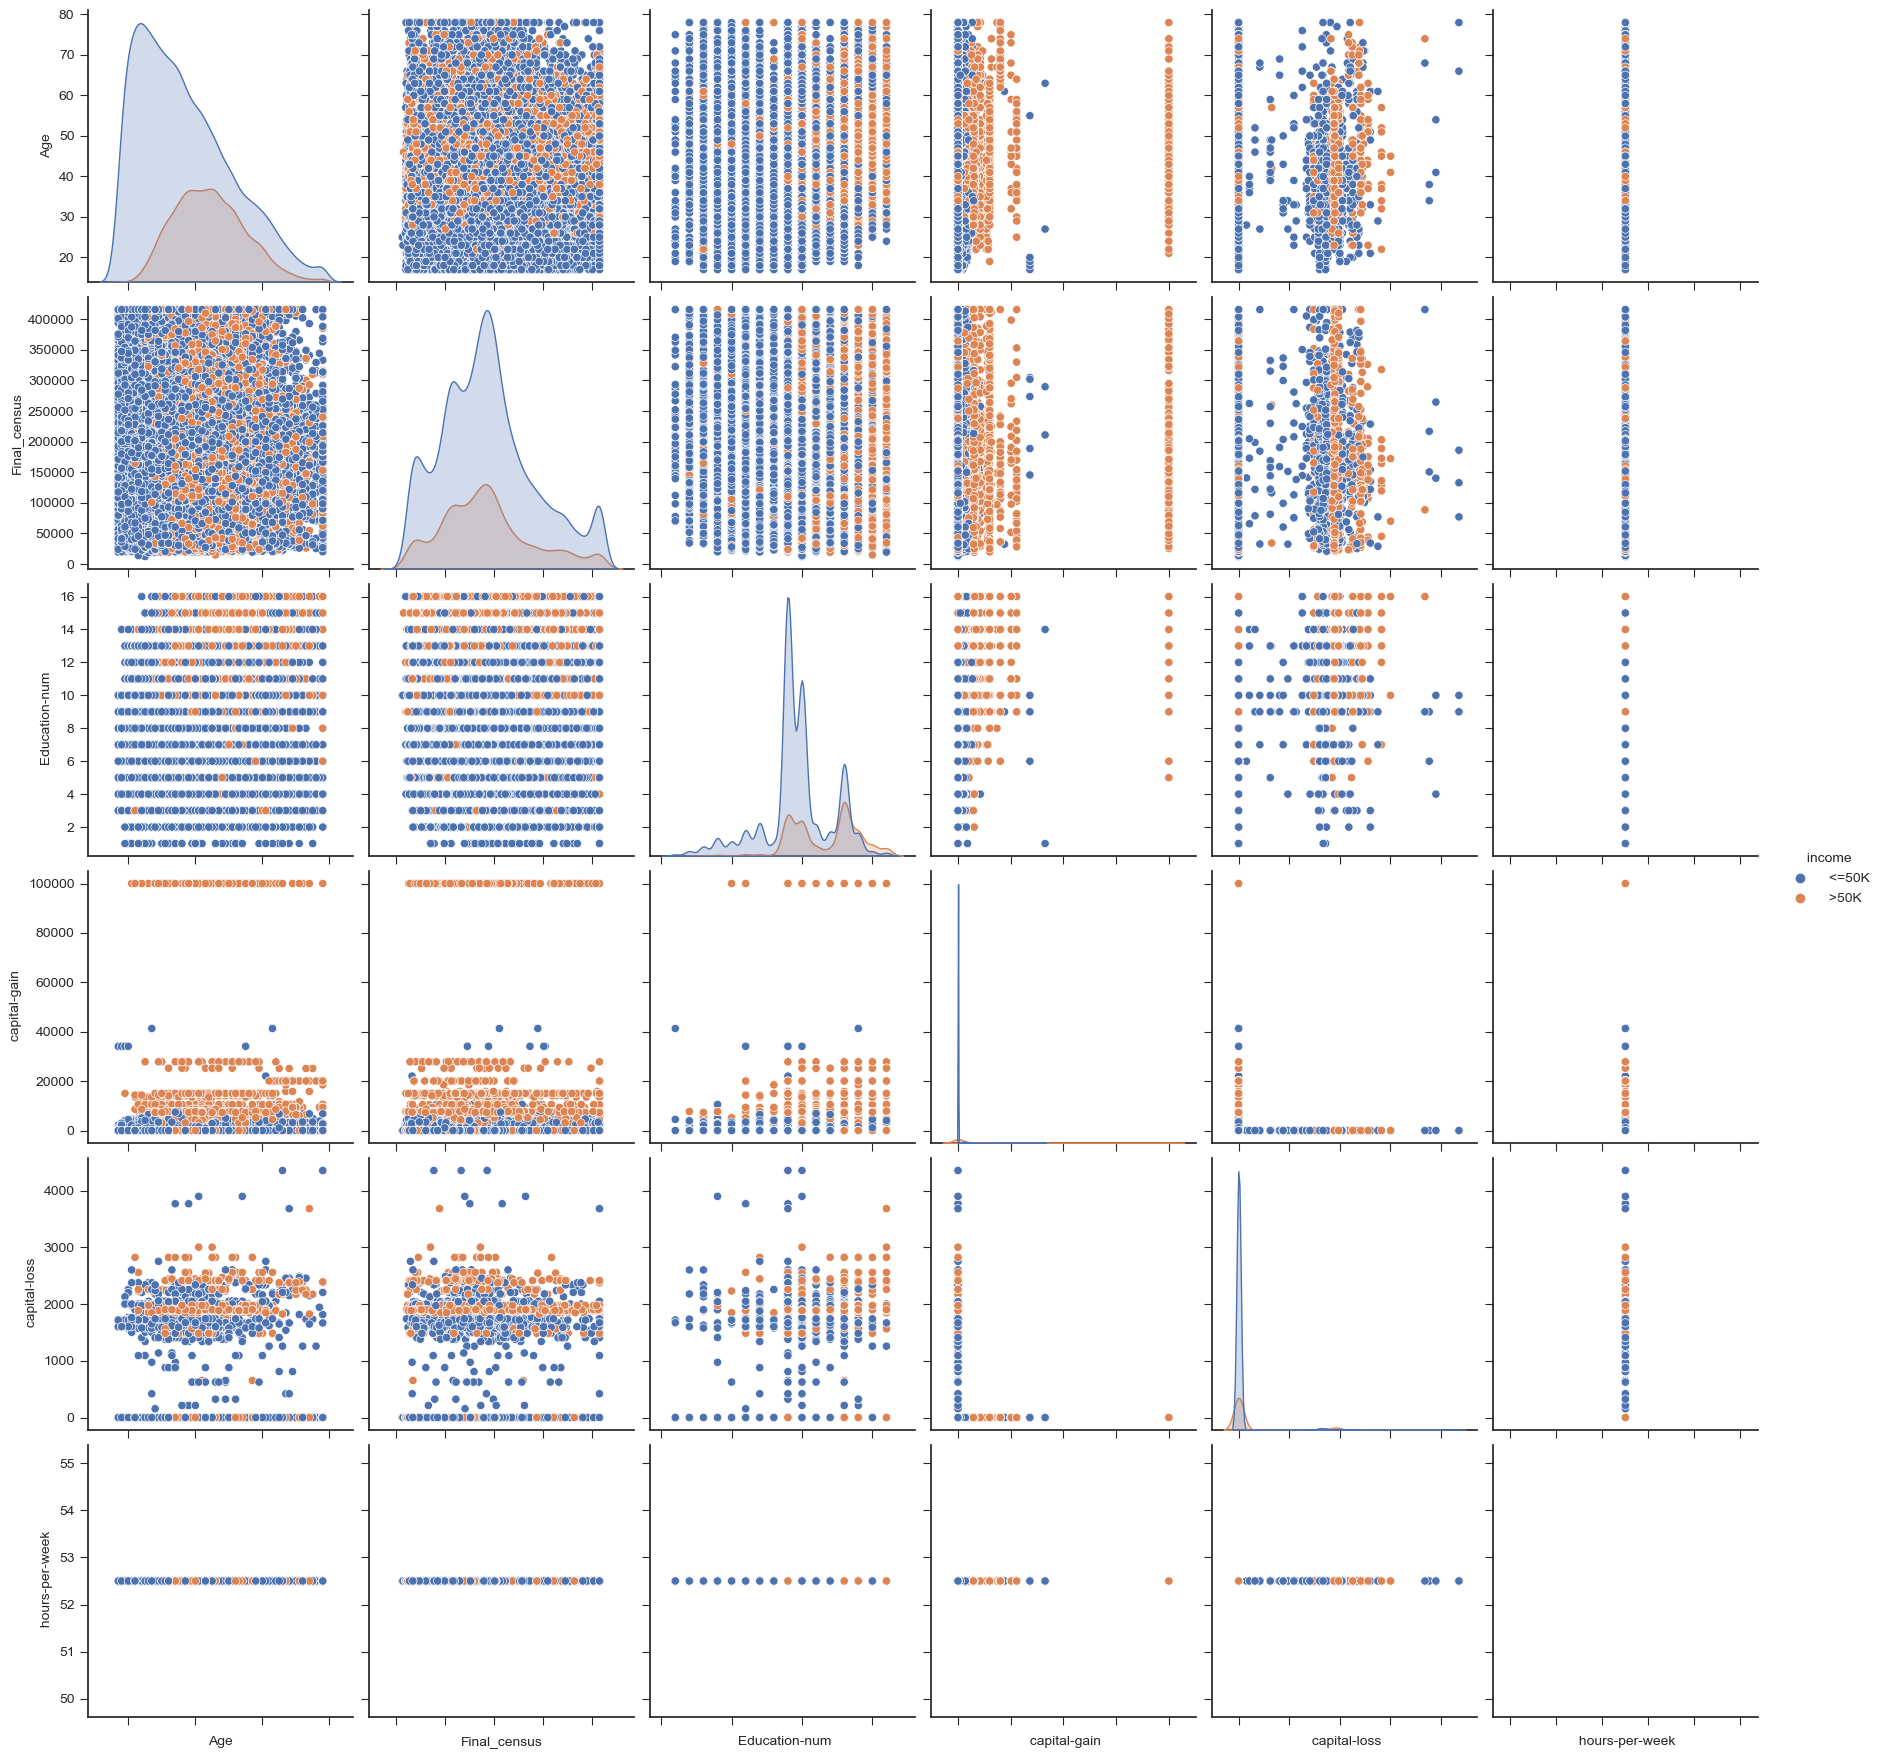

In [31]:
pp = sns.pairplot(df1, hue = ' income', palette = 'deep', size=3, diag_kws=dict(shade=True))
pp.set(xticklabels=[])

### Building Machine Learning Models

### Label encoding

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
df1 = df1.apply(LabelEncoder().fit_transform)
df1.tail()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,age
32556,10,4,16528,6,11,1,13,5,4,0,0,0,0,39,0,2
32557,23,4,8080,8,8,1,7,0,4,1,0,0,0,39,1,6
32558,41,4,7883,8,8,0,1,4,4,0,0,0,0,39,0,11
32559,5,4,12881,8,8,2,1,3,4,1,0,0,0,39,0,1
32560,35,5,17825,8,8,1,4,5,4,0,108,0,0,39,1,9


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x = df1.drop([" income"],axis=1)
y = df1[" income"]

In [36]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler , RobustScaler

In [37]:
scaler = StandardScaler()

In [38]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.03278248,  2.15057856, -1.29671921, ...,  0.        ,
         0.29156857,  0.15209355],
       [ 0.84423596,  1.46373585, -1.25441052, ...,  0.        ,
         0.29156857,  0.95691231],
       [-0.04098602,  0.09005041,  0.59721705, ...,  0.        ,
         0.29156857, -0.11617937],
       ...,
       [ 1.43438395,  0.09005041, -0.43196268, ...,  0.        ,
         0.29156857,  1.49345815],
       [-1.221282  ,  0.09005041,  0.39728773, ...,  0.        ,
         0.29156857, -1.18927105],
       [ 0.99177296,  0.77689313,  1.21757865, ...,  0.        ,
         0.29156857,  0.95691231]])

In [39]:
x_scaled = pd.DataFrame(x_scaled , columns = x.columns )
x_scaled

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,age
0,0.032782,2.150579,-1.296719,-1.663753,1.134739,0.447244,-1.317809,-0.277805,0.393668,0.703071,0.793942,-0.204177,0.0,0.291569,0.152094
1,0.844236,1.463736,-1.254411,-1.663753,1.134739,-0.817209,-0.608387,-0.900181,0.393668,0.703071,-0.279023,-0.204177,0.0,0.291569,0.956912
2,-0.040986,0.090050,0.597217,0.942351,-0.420060,1.711697,-0.135438,-0.277805,0.393668,0.703071,-0.279023,-0.204177,0.0,0.291569,-0.116179
3,1.065541,0.090050,0.804613,-2.036054,-1.197459,-0.817209,-0.135438,-0.900181,-1.962621,0.703071,-0.279023,-0.204177,0.0,0.291569,0.956912
4,-0.778671,0.090050,1.471431,-1.663753,1.134739,-0.817209,0.810458,2.211698,-1.962621,-1.422331,-0.279023,-0.204177,0.0,-4.054223,-0.652725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.852440,0.090050,1.002385,0.197750,0.746039,-0.817209,1.519881,2.211698,0.393668,-1.422331,-0.279023,-0.204177,0.0,0.291569,-0.920998
32557,0.106551,0.090050,-0.399277,0.942351,-0.420060,-0.817209,0.101036,-0.900181,0.393668,0.703071,-0.279023,-0.204177,0.0,0.291569,0.152094
32558,1.434384,0.090050,-0.431963,0.942351,-0.420060,-2.081662,-1.317809,1.589322,0.393668,-1.422331,-0.279023,-0.204177,0.0,0.291569,1.493458
32559,-1.221282,0.090050,0.397288,0.942351,-0.420060,0.447244,-1.317809,0.966947,0.393668,0.703071,-0.279023,-0.204177,0.0,0.291569,-1.189271


In [40]:
x_train , x_test , y_train , y_test = train_test_split(x_scaled , y , test_size = 0.2 ,stratify = y)          
y_train.shape
x_train.shape


(26048, 15)

### Balancing dataset

In [41]:
from imblearn.over_sampling import RandomOverSampler

In [42]:
over=RandomOverSampler()

In [43]:
x_train_over,y_train_over=over.fit_resample(x_train,y_train)
y_train_over.value_counts()

0    19775
1    19775
Name:  income, dtype: int64

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [45]:
model = XGBClassifier()
model.fit(x_train_over , y_train_over)
y_predict_xgb = model.predict(x_test)
print(accuracy_score(y_test , y_predict_xgb))
print(confusion_matrix(y_test , y_predict_xgb))

0.8358667280822969
[[4166  779]
 [ 290 1278]]


In [46]:
model1 = RandomForestClassifier()
model1.fit(x_train_over , y_train_over)
y_predict_rf = model.predict(x_test)
print(accuracy_score(y_test , y_predict_rf))
print(confusion_matrix(y_test , y_predict_rf))

0.8358667280822969
[[4166  779]
 [ 290 1278]]


In [47]:
model2 = DecisionTreeClassifier()
model2.fit(x_train_over , y_train_over)
y_predict_dt = model2.predict(x_test)
print(accuracy_score(y_test , y_predict_dt))
print(confusion_matrix(y_test , y_predict_dt))

0.8034699831107017
[[4313  632]
 [ 648  920]]


In [48]:
model3 = KNeighborsClassifier()
model3.fit(x_train_over , y_train_over)
y_predict_kn = model3.predict(x_test)
print(accuracy_score(y_test , y_predict_kn))
print(confusion_matrix(y_test , y_predict_kn))

0.7716873944418855
[[3833 1112]
 [ 375 1193]]


### Cross validation

In [50]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
xyz=[]
accuracy=[]
std=[]
classifiers=['KNeighborsClassifier','Decision Tree classifier','RandomForestClassifie' , 'xgboost']
models=[DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=9),RandomForestClassifier(n_estimators=100) ,XGBClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,x,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)
models_dataframe

,CV Mean,Std
KNeighborsClassifier,0.808421,0.005366
Decision Tree classifier,0.786002,0.007021
RandomForestClassifie,0.850896,0.005369
xgboost,0.869138,0.004822
